# Pandas

pandas - фраемворк для работы с табличными данными

Установка <code>pip install pandas</code>

In [1]:
import numpy as np

import pandas as pd  # стандартная запись импорта pandas

## pd.Series

pd.Series - один из двух основных типов данных в pandas

pd.Series представляет собой столбец/строку таблицы

### Создание pd.Series

pd.Series можно создать из любого итерируемого объекта

In [2]:
pd.Series([1, 2, 3])

0    1
1    2
2    3
dtype: int64

In [3]:
pd.Series(
    {0: 1, 1: 2, 2: 3}
)  # для словаря происходит преобразование ключей в индексы и значений в значения

0    1
1    2
2    3
dtype: int64

In [4]:
pd.Series((i for i in range(5)))

0    0
1    1
2    2
3    3
4    4
dtype: int64

In [5]:
pd.Series(
    [1, 2, 3], name="test"
)  # можно задать имя, имя используется как имя колонки в pd.DataFrame

0    1
1    2
2    3
Name: test, dtype: int64

In [6]:
pd.concat(
    [pd.Series([1, 2, 3], name="test"), pd.Series([4, 5, 6], name="answer")], axis=1
)  # pd.concat соеденяет pd.Series

,test,answer
0,1,4
1,2,5
2,3,6


In [7]:
pd.Series([1, 2, 3], name="test", index=[3, 4, 5])  # так же можно задать индексы

3    1
4    2
5    3
Name: test, dtype: int64

In [8]:
pd.Series(
    [1, 2, 3], name="test", index=["a", "b", "c"]
)  # индексы могут быть и строковыми

a    1
b    2
c    3
Name: test, dtype: int64

In [9]:
# pd.date_range возвращает DatetimeIndex от start до end включительно в количестве равным periods

pd.date_range(start="20190805", end="20190806", periods=3)

DatetimeIndex(['2019-08-05 00:00:00', '2019-08-05 12:00:00',
               '2019-08-06 00:00:00'],
              dtype='datetime64[ns]', freq=None)

In [10]:
pd.Series(
    [1, 2, 3],
    name="test",
    index=pd.date_range(start="20190805", end="20190806", periods=3),
)  # и даже datetime

2019-08-05 00:00:00    1
2019-08-05 12:00:00    2
2019-08-06 00:00:00    3
Name: test, dtype: int64

pd.Series - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html

### индексирование pd.Series

для индексирования pd.Series есть 2 метода:

.loc - используется при \_\_getitem__, индексирует по имени индекса

.iloc - индексирует по порядковому номеру, аналогичен индексированию в numpy

In [11]:
a = pd.Series(range(5), index=["a", "b", "c", "d", "e"])

In [12]:
a

a    0
b    1
c    2
d    3
e    4
dtype: int64

In [13]:
a["a"]

0

In [14]:
a.loc["a"]

0

In [15]:
a[["a", "c"]]  # индексирование похоже на numpy

a    0
c    2
dtype: int64

In [16]:
a[a.index < "d"]

a    0
b    1
c    2
dtype: int64

In [17]:
a[a < 3]  # логические индексы по значениям работают только для .loc

a    0
b    1
c    2
dtype: int64

In [18]:
a[(a < 2) | (a > 3)]  # или, каждое условие в скобке

a    0
b    1
e    4
dtype: int64

In [19]:
a[(a > 2) & (a < 4)]  # и

d    3
dtype: int64

In [20]:
c = pd.Series(range(10000))

In [21]:
c.head(10)  # первые n элементов, по умолчанию 5

0    0
1    1
2    2
3    3
4    4
5    5
6    6
7    7
8    8
9    9
dtype: int64

In [22]:
c.tail(8)  # последние n эдементов, по умолчанию 5

9992    9992
9993    9993
9994    9994
9995    9995
9996    9996
9997    9997
9998    9998
9999    9999
dtype: int64

In [23]:
c.head(100).tail(5)  # c 95 по 100

95    95
96    96
97    97
98    98
99    99
dtype: int64

In [24]:
(c % 5).value_counts()  # Series с количеством значений в нем

0    2000
1    2000
2    2000
3    2000
4    2000
dtype: int64

In [25]:
c.unique()  # уникальные элементы в pd.Series

array([   0,    1,    2, ..., 9997, 9998, 9999], dtype=int64)

In [26]:
c.nunique()  # количество уникальных элементов

10000

индексирование pd.Series - https://pandas.pydata.org/pandas-docs/stable/reference/series.html#indexing-iteration

### Арифметические операции с pd.Series 

работа со скалярами полностью аналогична np.array

разница при работе с pd.Series, необходимо совпадение индексов

In [27]:
a

a    0
b    1
c    2
d    3
e    4
dtype: int64

In [28]:
b = pd.Series(range(4), ["c", "d", "e", "f"])

In [29]:
a + b  # не совпадающие индексы будут заполенены np.nan, пустое значение

a    NaN
b    NaN
c    2.0
d    4.0
e    6.0
f    NaN
dtype: float64

In [30]:
(a + b).fillna(-1)  # fillna заполняет пропуски

a   -1.0
b   -1.0
c    2.0
d    4.0
e    6.0
f   -1.0
dtype: float64

In [31]:
a * b

a    NaN
b    NaN
c    0.0
d    3.0
e    8.0
f    NaN
dtype: float64

In [32]:
a / b  # inf при делении на ноль

a    NaN
b    NaN
c    inf
d    3.0
e    2.0
f    NaN
dtype: float64

In [33]:
np.log1p(a)  # операции numpy доступны для pd.Series

a    0.000000
b    0.693147
c    1.098612
d    1.386294
e    1.609438
dtype: float64

Статистика полностью аналогична np.array с той лишь разницей, что оценки по умолчанию несмещенные

Операции с pd.Series - https://pandas.pydata.org/pandas-docs/stable/reference/series.html#binary-operator-functions

### Визуализация pd.Series 

In [34]:
a = pd.Series(
    np.random.normal(5, 2, 1000)
)  # нормальное распеределение с центром 5 и отклонением 2, размера 100

In [35]:
a.head()

0    4.949534
1    4.185602
2    5.139060
3    9.632493
4    6.530247
dtype: float64

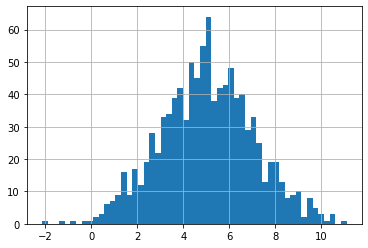

In [36]:
a.hist(bins=int(np.sqrt(3 * a.shape[0])));  # гистограмма, bins - количество столбцов

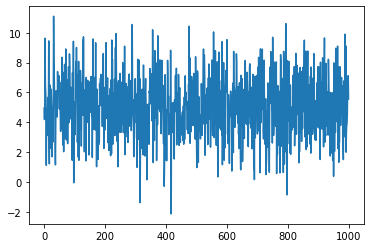

In [37]:
a.plot();  # значение pd.Series по отношению к индексу

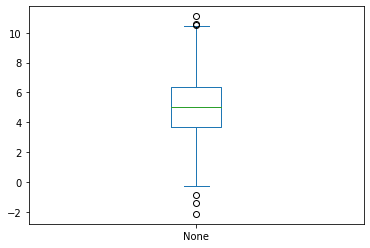

In [38]:
a.plot.box();  # boxplot

визуализация pd.Series - https://pandas.pydata.org/pandas-docs/stable/reference/series.html#plotting

### map и apply

map - принимает в себя объект с парами ключ-значение и возвращает значение по ключу из элементов pd.Series

In [39]:
d = {i: i ** 2 for i in range(100)}

In [40]:
a = pd.Series(range(100))

In [41]:
a.head()

0    0
1    1
2    2
3    3
4    4
dtype: int64

In [42]:
a.map(d).head()

0     0
1     1
2     4
3     9
4    16
dtype: int64

apply - применяет функцию к каждому элементу pd.Series

In [43]:
a.apply(lambda x: x % 3).head(10)

0    0
1    1
2    2
3    0
4    1
5    2
6    0
7    1
8    2
9    0
dtype: int64

### expanding  и rolling

expanding - возвращает увеличивающийся срез pd.Series начиная с n элементов

In [44]:
a.expanding(2).mean().head(10)

0    NaN
1    0.5
2    1.0
3    1.5
4    2.0
5    2.5
6    3.0
7    3.5
8    4.0
9    4.5
dtype: float64

rolling - возвращает движущееся окно размером n

In [45]:
a.rolling(2).mean().head()

0    NaN
1    0.5
2    1.5
3    2.5
4    3.5
dtype: float64

https://pandas.pydata.org/pandas-docs/stable/reference/series.html#function-application-groupby-window

### другие полезные функции

In [46]:
a = pd.Series(range(3))

b = pd.Series(range(3))

In [47]:
a.append(b)  # объеденение pd.Series

0    0
1    1
2    2
0    0
1    1
2    2
dtype: int64

In [48]:
a = pd.Series(np.random.rand(100), index=np.random.randint(1, 1000, 100))

In [49]:
a.head()

929    0.904400
80     0.892516
948    0.164087
986    0.335143
550    0.152822
dtype: float64

In [50]:
a.sort_values(
    ascending=True
).head()  # сортировка по значение, параметр inplace изменит pd.Series на месте

450    0.004127
540    0.009161
314    0.012691
112    0.028367
111    0.043198
dtype: float64

In [51]:
a.sort_index(ascending=False).head()  # сортрировка по индексу

997    0.889146
993    0.925464
990    0.186992
986    0.335143
966    0.273820
dtype: float64

In [52]:
a.reset_index(
    inplace=True, drop=True
)  # сброс индекса на стандартный (порядковый номер)

In [53]:
a.head()

0    0.904400
1    0.892516
2    0.164087
3    0.335143
4    0.152822
dtype: float64

методы pd.Series - https://pandas.pydata.org/pandas-docs/stable/reference/series.html#

## pd.DataFrame 

pd.DataFrame - представляет собой двумерный массив с индексами строк и колонок, таблица в SQL

каждая из колонок и строк pd.DataFrame это отдельный pd.Series

###  создание pd.DataFrame

dataframe может быть создан из двумерных массивов, словарей, списков и много другого

In [54]:
pd.DataFrame(np.random.rand(4, 4))

,0,1,2,3
0,0.758872,0.976032,0.501032,0.068297
1,0.891763,0.526443,0.095982,0.599609
2,0.157227,0.836692,0.335700,0.465746
3,0.137803,0.295344,0.283177,0.425334


In [55]:
pd.DataFrame(np.random.rand(4, 4), columns=["a", "b", "c", "d"])

,a,b,c,d
0,0.981706,0.041797,0.520081,0.782920
1,0.345507,0.282022,0.359000,0.734865
2,0.890567,0.169524,0.771549,0.285676
3,0.000246,0.381987,0.796115,0.793638


In [56]:
pd.DataFrame({"a": [1, 2], "b": [3, 4]}, index=["c", "d"])

,a,b
c,1,3
d,2,4


конструктор pd.DataFrame - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html

### индексирование pd.DataFrame

есть 3 типа индекса в pd.DataFrame

основной \_\_getitem__ - индекс по столбцам

.loc - индекс по имени строк

.iloc - порядковый индекс

In [57]:
data = pd.DataFrame(
    {
        "round": [(i // 3) + 1 for i in range(300)],
        "player": [1, 2, 3] * 100,
        "1st_dice": np.random.randint(1, 7, 300),
        "2nd_dice": np.random.randint(1, 7, 300),
        "3rd_dice": np.random.randint(1, 7, 300),
    },
    index=range(10, 310),
)  # моделирование игры в кости

In [58]:
data.info()  # количество заполненных значений и их тип по колонкам

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 10 to 309
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   round     300 non-null    int64
 1   player    300 non-null    int64
 2   1st_dice  300 non-null    int32
 3   2nd_dice  300 non-null    int32
 4   3rd_dice  300 non-null    int32
dtypes: int32(3), int64(2)
memory usage: 8.3 KB


In [59]:
data.head(10)

,round,player,1st_dice,2nd_dice,3rd_dice
10,1,1,2,6,5
11,1,2,3,3,3
12,1,3,6,3,5
13,2,1,4,1,3
14,2,2,2,4,2
15,2,3,6,3,5
16,3,1,1,6,1
17,3,2,1,3,3
18,3,3,4,1,2
19,4,1,4,1,2


In [60]:
data["round"].head()

10    1
11    1
12    1
13    2
14    2
Name: round, dtype: int64

In [61]:
data[
    ["round", "1st_dice"]
].head()  # индекс по нескольким столбцам возвращает pd.DataFrame иначе pd.Series

,round,1st_dice
10,1,2
11,1,3
12,1,6
13,2,4
14,2,2


In [62]:
data[
    (data["1st_dice"] > 3) | (data["2nd_dice"] < 6)
].head()  # при основном индексировании, логический индекс идет по строке

,round,player,1st_dice,2nd_dice,3rd_dice
11,1,2,3,3,3
12,1,3,6,3,5
13,2,1,4,1,3
14,2,2,2,4,2
15,2,3,6,3,5


In [63]:
data.loc[
    [13, 14]
]  # индекс по нескольким строкам возвращает pd.DataFrame иначе pd.Series

,round,player,1st_dice,2nd_dice,3rd_dice
13,2,1,4,1,3
14,2,2,2,4,2


In [64]:
data.loc[
    [13, 14], ["round", "player"]
]  # после запятой мы можем указать колонки для выбора

,round,player
13,2,1
14,2,2


In [65]:
# логический индекс применяется в строковой части

data.loc[(data["round"] % 3 == 1), ["round", "player", "1st_dice"]].head(10)

,round,player,1st_dice
10,1,1,2
11,1,2,3
12,1,3,6
19,4,1,4
20,4,2,1
21,4,3,4
28,7,1,4
29,7,2,5
30,7,3,5
37,10,1,6


In [66]:
data.iloc[
    [1, 2]
]  # порядковый индекс может принимать либо массив индексов строк, либо один индекс строки

,round,player,1st_dice,2nd_dice,3rd_dice
11,1,2,3,3,3
12,1,3,6,3,5


In [67]:
data["new_column"] = "new"  # добавление новой колонки

In [68]:
data.head()

,round,player,1st_dice,2nd_dice,3rd_dice,new_column
10,1,1,2,6,5,new
11,1,2,3,3,3,new
12,1,3,6,3,5,new
13,2,1,4,1,3,new
14,2,2,2,4,2,new


data.index - массив индекса dataframe

data.column - массив колонок dataframe

In [69]:
data.loc[data.index.max() + 1] = {
    "round": 310,
    "player": 1,
    "1st_dice": 3,
    "2nd_dice": 4,
    "3rd_dice": 5,
    "new_column": "new",
}

In [70]:
data.tail()

,round,player,1st_dice,2nd_dice,3rd_dice,new_column
306,99,3,2,3,3,new
307,100,1,4,6,1,new
308,100,2,2,6,4,new
309,100,3,2,5,2,new
310,310,1,3,4,5,new


индексация pd.DataFrame - https://pandas.pydata.org/pandas-docs/stable/reference/frame.html#indexing-iteration

### Арифметические и статические операции

арифметические операции аналогичны pd.Series, с той разницей что теперь появляется спецификация осей, для общих функций

In [71]:
data.sum()  # axis=0 по умолчанию

round                                                     15460
player                                                      601
1st_dice                                                   1066
2nd_dice                                                   1074
3rd_dice                                                   1065
new_column    newnewnewnewnewnewnewnewnewnewnewnewnewnewnewn...
dtype: object

In [72]:
data.mean(axis=1).head()

C:\Users\ANTON~1.NES\AppData\Local\Temp/ipykernel_3456/2221169960.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.mean(axis=1).head()


10    3.0
11    2.4
12    3.6
13    2.2
14    2.4
dtype: float64

In [73]:
# скаляр применяется ко всему датафрейму

# если имеются элементы с нечисловыми значениями будет вызвана ошибка

(data[["round", "1st_dice"]] + 1).head()

,round,1st_dice
10,2,3
11,2,4
12,2,7
13,3,5
14,3,3


In [74]:
data.nunique()  # количество уникальных значений, не учитывая np.nan

round         101
player          3
1st_dice        6
2nd_dice        6
3rd_dice        6
new_column      1
dtype: int64

In [75]:
data.describe(include="all")  # статистическая сводка по датасету

,round,player,1st_dice,2nd_dice,3rd_dice,new_column
count,301.000000,301.000000,301.000000,301.000000,301.000000,301
unique,NaN,NaN,NaN,NaN,NaN,1
top,NaN,NaN,NaN,NaN,NaN,new
freq,NaN,NaN,NaN,NaN,NaN,301
mean,51.362126,1.996678,3.541528,3.568106,3.538206,NaN
std,32.511102,0.818529,1.703654,1.724194,1.701774,NaN
min,1.000000,1.000000,1.000000,1.000000,1.000000,NaN
25%,26.000000,1.000000,2.000000,2.000000,2.000000,NaN
50%,51.000000,2.000000,4.000000,4.000000,4.000000,NaN
75%,76.000000,3.000000,5.000000,5.000000,5.000000,NaN


In [76]:
data.corr(method="pearson")  # таблица корелляции между признаками

,round,player,1st_dice,2nd_dice,3rd_dice
round,1.000000,-0.032397,-0.014505,0.057150,0.057316
player,-0.032397,1.000000,-0.020219,-0.112029,-0.115969
1st_dice,-0.014505,-0.020219,1.000000,-0.073308,-0.038778
2nd_dice,0.057150,-0.112029,-0.073308,1.000000,0.026091
3rd_dice,0.057316,-0.115969,-0.038778,0.026091,1.000000


арифмитические операции в pd.DataFrame - https://pandas.pydata.org/pandas-docs/stable/reference/frame.html#computations-descriptive-stats

### Drop, join, concat, merge, reindex, pivot

In [77]:
data.loc[311] = data.loc[10]  # добавление дуплицирующей строки

In [78]:
data.tail()

,round,player,1st_dice,2nd_dice,3rd_dice,new_column
307,100,1,4,6,1,new
308,100,2,2,6,4,new
309,100,3,2,5,2,new
310,310,1,3,4,5,new
311,1,1,2,6,5,new


In [79]:
data.shape

(302, 6)

In [80]:
data.drop_duplicates().tail()  # удаление дубликатов строк

,round,player,1st_dice,2nd_dice,3rd_dice,new_column
306,99,3,2,3,3,new
307,100,1,4,6,1,new
308,100,2,2,6,4,new
309,100,3,2,5,2,new
310,310,1,3,4,5,new


In [81]:
data.drop_duplicates().shape

(301, 6)

In [82]:
# можем специфицировать колонки

data.drop_duplicates(["player", "1st_dice", "2nd_dice", "3rd_dice", "new_column"]).shape

(243, 6)

In [83]:
# изменение датафрейма на месте

data.drop_duplicates(inplace=True)

In [84]:
data.shape

(301, 6)

In [85]:
data.drop(310, axis=0).tail()  # удаление строки по индексу

,round,player,1st_dice,2nd_dice,3rd_dice,new_column
305,99,2,1,6,2,new
306,99,3,2,3,3,new
307,100,1,4,6,1,new
308,100,2,2,6,4,new
309,100,3,2,5,2,new


In [86]:
data.drop(index=[310], inplace=True)

In [87]:
data.drop(columns=["new_column"], inplace=True)

In [88]:
new_dice = pd.DataFrame(
    {
        "4th_dice": np.random.randint(1, 7, 300),
        "5th_dice": np.random.randint(1, 7, 300),
    },
    index=range(15, 315),
)

In [89]:
new_dice.head()

,4th_dice,5th_dice
15,2,3
16,6,2
17,3,1
18,1,3
19,6,6


In [90]:
# соедение датафреймов по столбцам/строкам в зависимости от axis

# соеденение происходит по индексам, если у какого датафрейма нет этого индекса

# все значения колонок будут заполнены np.nan

pd.concat([data, new_dice], axis=1).head(10)

,round,player,1st_dice,2nd_dice,3rd_dice,4th_dice,5th_dice
10,1.0,1.0,2.0,6.0,5.0,NaN,NaN
11,1.0,2.0,3.0,3.0,3.0,NaN,NaN
12,1.0,3.0,6.0,3.0,5.0,NaN,NaN
13,2.0,1.0,4.0,1.0,3.0,NaN,NaN
14,2.0,2.0,2.0,4.0,2.0,NaN,NaN
15,2.0,3.0,6.0,3.0,5.0,2.0,3.0
16,3.0,1.0,1.0,6.0,1.0,6.0,2.0
17,3.0,2.0,1.0,3.0,3.0,3.0,1.0
18,3.0,3.0,4.0,1.0,2.0,1.0,3.0
19,4.0,1.0,4.0,1.0,2.0,6.0,6.0


In [91]:
pd.concat([data, new_dice], axis=0, sort=False).head(5)

,round,player,1st_dice,2nd_dice,3rd_dice,4th_dice,5th_dice
10,1.0,1.0,2.0,6.0,5.0,NaN,NaN
11,1.0,2.0,3.0,3.0,3.0,NaN,NaN
12,1.0,3.0,6.0,3.0,5.0,NaN,NaN
13,2.0,1.0,4.0,1.0,3.0,NaN,NaN
14,2.0,2.0,2.0,4.0,2.0,NaN,NaN


In [92]:
pd.concat([data, new_dice], axis=0, sort=False).tail(5)

,round,player,1st_dice,2nd_dice,3rd_dice,4th_dice,5th_dice
310,NaN,NaN,NaN,NaN,NaN,5.0,4.0
311,NaN,NaN,NaN,NaN,NaN,4.0,4.0
312,NaN,NaN,NaN,NaN,NaN,3.0,1.0
313,NaN,NaN,NaN,NaN,NaN,6.0,2.0
314,NaN,NaN,NaN,NaN,NaN,3.0,6.0


In [93]:
data = pd.concat([data, new_dice], axis=1)

In [94]:
age = pd.DataFrame({"player": [1, 2, 3], "age": [25, 27, 30]})

In [95]:
age

,player,age
0,1,25
1,2,27
2,3,30


In [96]:
pd.merge(data, age, on="player", how="left").head(
    10
)  # соеденение 2х датафреймов по столбцу, работает как join в sql

,round,player,1st_dice,2nd_dice,3rd_dice,4th_dice,5th_dice,age
0,1.0,1.0,2.0,6.0,5.0,NaN,NaN,25.0
1,1.0,2.0,3.0,3.0,3.0,NaN,NaN,27.0
2,1.0,3.0,6.0,3.0,5.0,NaN,NaN,30.0
3,2.0,1.0,4.0,1.0,3.0,NaN,NaN,25.0
4,2.0,2.0,2.0,4.0,2.0,NaN,NaN,27.0
5,2.0,3.0,6.0,3.0,5.0,2.0,3.0,30.0
6,3.0,1.0,1.0,6.0,1.0,6.0,2.0,25.0
7,3.0,2.0,1.0,3.0,3.0,3.0,1.0,27.0
8,3.0,3.0,4.0,1.0,2.0,1.0,3.0,30.0
9,4.0,1.0,4.0,1.0,2.0,6.0,6.0,25.0


In [97]:
data = pd.merge(data, age, on="player", how="left")

In [98]:
data.reset_index(drop=False).head()  # замена на индекс по умолчанию

,index,round,player,1st_dice,2nd_dice,3rd_dice,4th_dice,5th_dice,age
0,0,1.0,1.0,2.0,6.0,5.0,NaN,NaN,25.0
1,1,1.0,2.0,3.0,3.0,3.0,NaN,NaN,27.0
2,2,1.0,3.0,6.0,3.0,5.0,NaN,NaN,30.0
3,3,2.0,1.0,4.0,1.0,3.0,NaN,NaN,25.0
4,4,2.0,2.0,2.0,4.0,2.0,NaN,NaN,27.0


In [99]:
data.reset_index(drop=True).head()  # не возвращать колонку индекса

,round,player,1st_dice,2nd_dice,3rd_dice,4th_dice,5th_dice,age
0,1.0,1.0,2.0,6.0,5.0,NaN,NaN,25.0
1,1.0,2.0,3.0,3.0,3.0,NaN,NaN,27.0
2,1.0,3.0,6.0,3.0,5.0,NaN,NaN,30.0
3,2.0,1.0,4.0,1.0,3.0,NaN,NaN,25.0
4,2.0,2.0,2.0,4.0,2.0,NaN,NaN,27.0


In [100]:
data.set_index("round").head()  # устанавливает колонку в качестве индекса

,player,1st_dice,2nd_dice,3rd_dice,4th_dice,5th_dice,age
round,,,,,,,
1.0,1.0,2.0,6.0,5.0,NaN,NaN,25.0
1.0,2.0,3.0,3.0,3.0,NaN,NaN,27.0
1.0,3.0,6.0,3.0,5.0,NaN,NaN,30.0
2.0,1.0,4.0,1.0,3.0,NaN,NaN,25.0
2.0,2.0,2.0,4.0,2.0,NaN,NaN,27.0


In [101]:
data.dropna().head()  # удаление строк с пустыми значениями

,round,player,1st_dice,2nd_dice,3rd_dice,4th_dice,5th_dice,age
5,2.0,3.0,6.0,3.0,5.0,2.0,3.0,30.0
6,3.0,1.0,1.0,6.0,1.0,6.0,2.0,25.0
7,3.0,2.0,1.0,3.0,3.0,3.0,1.0,27.0
8,3.0,3.0,4.0,1.0,2.0,1.0,3.0,30.0
9,4.0,1.0,4.0,1.0,2.0,6.0,6.0,25.0


In [102]:
data.dropna(inplace=True)

In [103]:
data.T.head()  # переворот таблицы

,5,6,7,8,9,10,11,12,13,14,...,290,291,292,293,294,295,296,297,298,299
round,2.0,3.0,3.0,3.0,4.0,4.0,4.0,5.0,5.0,5.0,...,97.0,98.0,98.0,98.0,99.0,99.0,99.0,100.0,100.0,100.0
player,3.0,1.0,2.0,3.0,1.0,2.0,3.0,1.0,2.0,3.0,...,3.0,1.0,2.0,3.0,1.0,2.0,3.0,1.0,2.0,3.0
1st_dice,6.0,1.0,1.0,4.0,4.0,1.0,4.0,5.0,6.0,4.0,...,4.0,6.0,4.0,1.0,3.0,1.0,2.0,4.0,2.0,2.0
2nd_dice,3.0,6.0,3.0,1.0,1.0,4.0,6.0,4.0,5.0,1.0,...,1.0,4.0,6.0,4.0,1.0,6.0,3.0,6.0,6.0,5.0
3rd_dice,5.0,1.0,3.0,2.0,2.0,5.0,2.0,6.0,4.0,4.0,...,2.0,3.0,5.0,6.0,2.0,2.0,3.0,1.0,4.0,2.0


In [104]:
data.pivot_table(
    index="round", columns="player", values="1st_dice", aggfunc="mean"
).head()  # сводная таблица

player,1.0,2.0,3.0
round,,,
2.0,NaN,NaN,6.0
3.0,1.0,1.0,4.0
4.0,4.0,1.0,4.0
5.0,5.0,6.0,4.0
6.0,2.0,4.0,6.0


манипуляция индексом - https://pandas.pydata.org/pandas-docs/stable/reference/frame.html#reindexing-selection-label-manipulation

объедение - https://pandas.pydata.org/pandas-docs/stable/reference/frame.html#reindexing-selection-label-manipulation

### Groupby, agg, transform

DataFrame умеет возвращать статистики по аггрегированным значениям

In [105]:
data["1st_dice"].value_counts()  # количество каждого из значений

4.0    58
2.0    54
6.0    51
5.0    48
1.0    46
3.0    38
Name: 1st_dice, dtype: int64

In [106]:
data["sum"] = (
    data["1st_dice"]
    + data["2nd_dice"]
    + data["3rd_dice"]
    + data["4th_dice"]
    + data["5th_dice"]
)

In [107]:
data.head()

,round,player,1st_dice,2nd_dice,3rd_dice,4th_dice,5th_dice,age,sum
5,2.0,3.0,6.0,3.0,5.0,2.0,3.0,30.0,19.0
6,3.0,1.0,1.0,6.0,1.0,6.0,2.0,25.0,16.0
7,3.0,2.0,1.0,3.0,3.0,3.0,1.0,27.0,11.0
8,3.0,3.0,4.0,1.0,2.0,1.0,3.0,30.0,11.0
9,4.0,1.0,4.0,1.0,2.0,6.0,6.0,25.0,19.0


In [108]:
data.groupby("round")[
    "sum"
].mean().head()  # мы можем вызвать статистические функции на сгруппированные данные

round
2.0    19.000000
3.0    12.666667
4.0    20.333333
5.0    20.666667
6.0    21.000000
Name: sum, dtype: float64

In [109]:
data.groupby("round")["sum"].agg(
    "mean"
).head()  # аналогично agg с переданным именем функции

round
2.0    19.000000
3.0    12.666667
4.0    20.333333
5.0    20.666667
6.0    21.000000
Name: sum, dtype: float64

In [110]:
data.groupby("round")["sum"].transform(
    "mean"
).head()  # transform возвращает значения с изначальным индексом

5    19.000000
6    12.666667
7    12.666667
8    12.666667
9    20.333333
Name: sum, dtype: float64

In [111]:
# если вызвать agg на сам groupby то можно специфицировать функции для каждой колонки

group = data.groupby("round").agg({"1st_dice": ["mean", "std"], "2nd_dice": "median"})

In [112]:
group.head()  # мультииндекс для колонок

1st_dice           2nd_dice
          mean       std   median
round                            
2.0        6.0       NaN      3.0
3.0        2.0  1.732051      3.0
4.0        3.0  1.732051      4.0
5.0        5.0  1.000000      4.0
6.0        4.0  2.000000      5.0

In [113]:
group[
    [("1st_dice", "mean"), ("2nd_dice", "median")]
].head()  # синтаксис для обращения к мультииндексу

,1st_dice,2nd_dice
,mean,median
round,,
2.0,6.0,3.0
3.0,2.0,3.0
4.0,3.0,4.0
5.0,5.0,4.0
6.0,4.0,5.0


groupby, map, apply - https://pandas.pydata.org/pandas-docs/stable/reference/frame.html#function-application-groupby-window

## Полезные материалы

документация по pandas - https://pandas.pydata.org/pandas-docs/stable/index.html

Майкл Хейдт: Изучаем pandas - хорошая книга по данной библиотеке

корелляция - https://ru.wikipedia.org/wiki/%D0%9A%D0%BE%D1%80%D1%80%D0%B5%D0%BB%D1%8F%D1%86%D0%B8%D1%8F